# Часть 1.
# Статистические модели прогнозирования.

In [1]:
import pandas as pd

data = pd.read_csv("data/ghana_gdp.csv", parse_dates=["year"], index_col=["year"])
data.head()

,GDP (current US$)
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


In [2]:
data["gdp_vol"] = data["GDP (current US$)"]
data = data.drop('GDP (current US$)', axis = 1)
train_df = data.loc[:"2018-12-31"]
test_df = data.loc["2019-01-01":]
train_df.shape, test_df.shape

((59, 1), (3, 1))

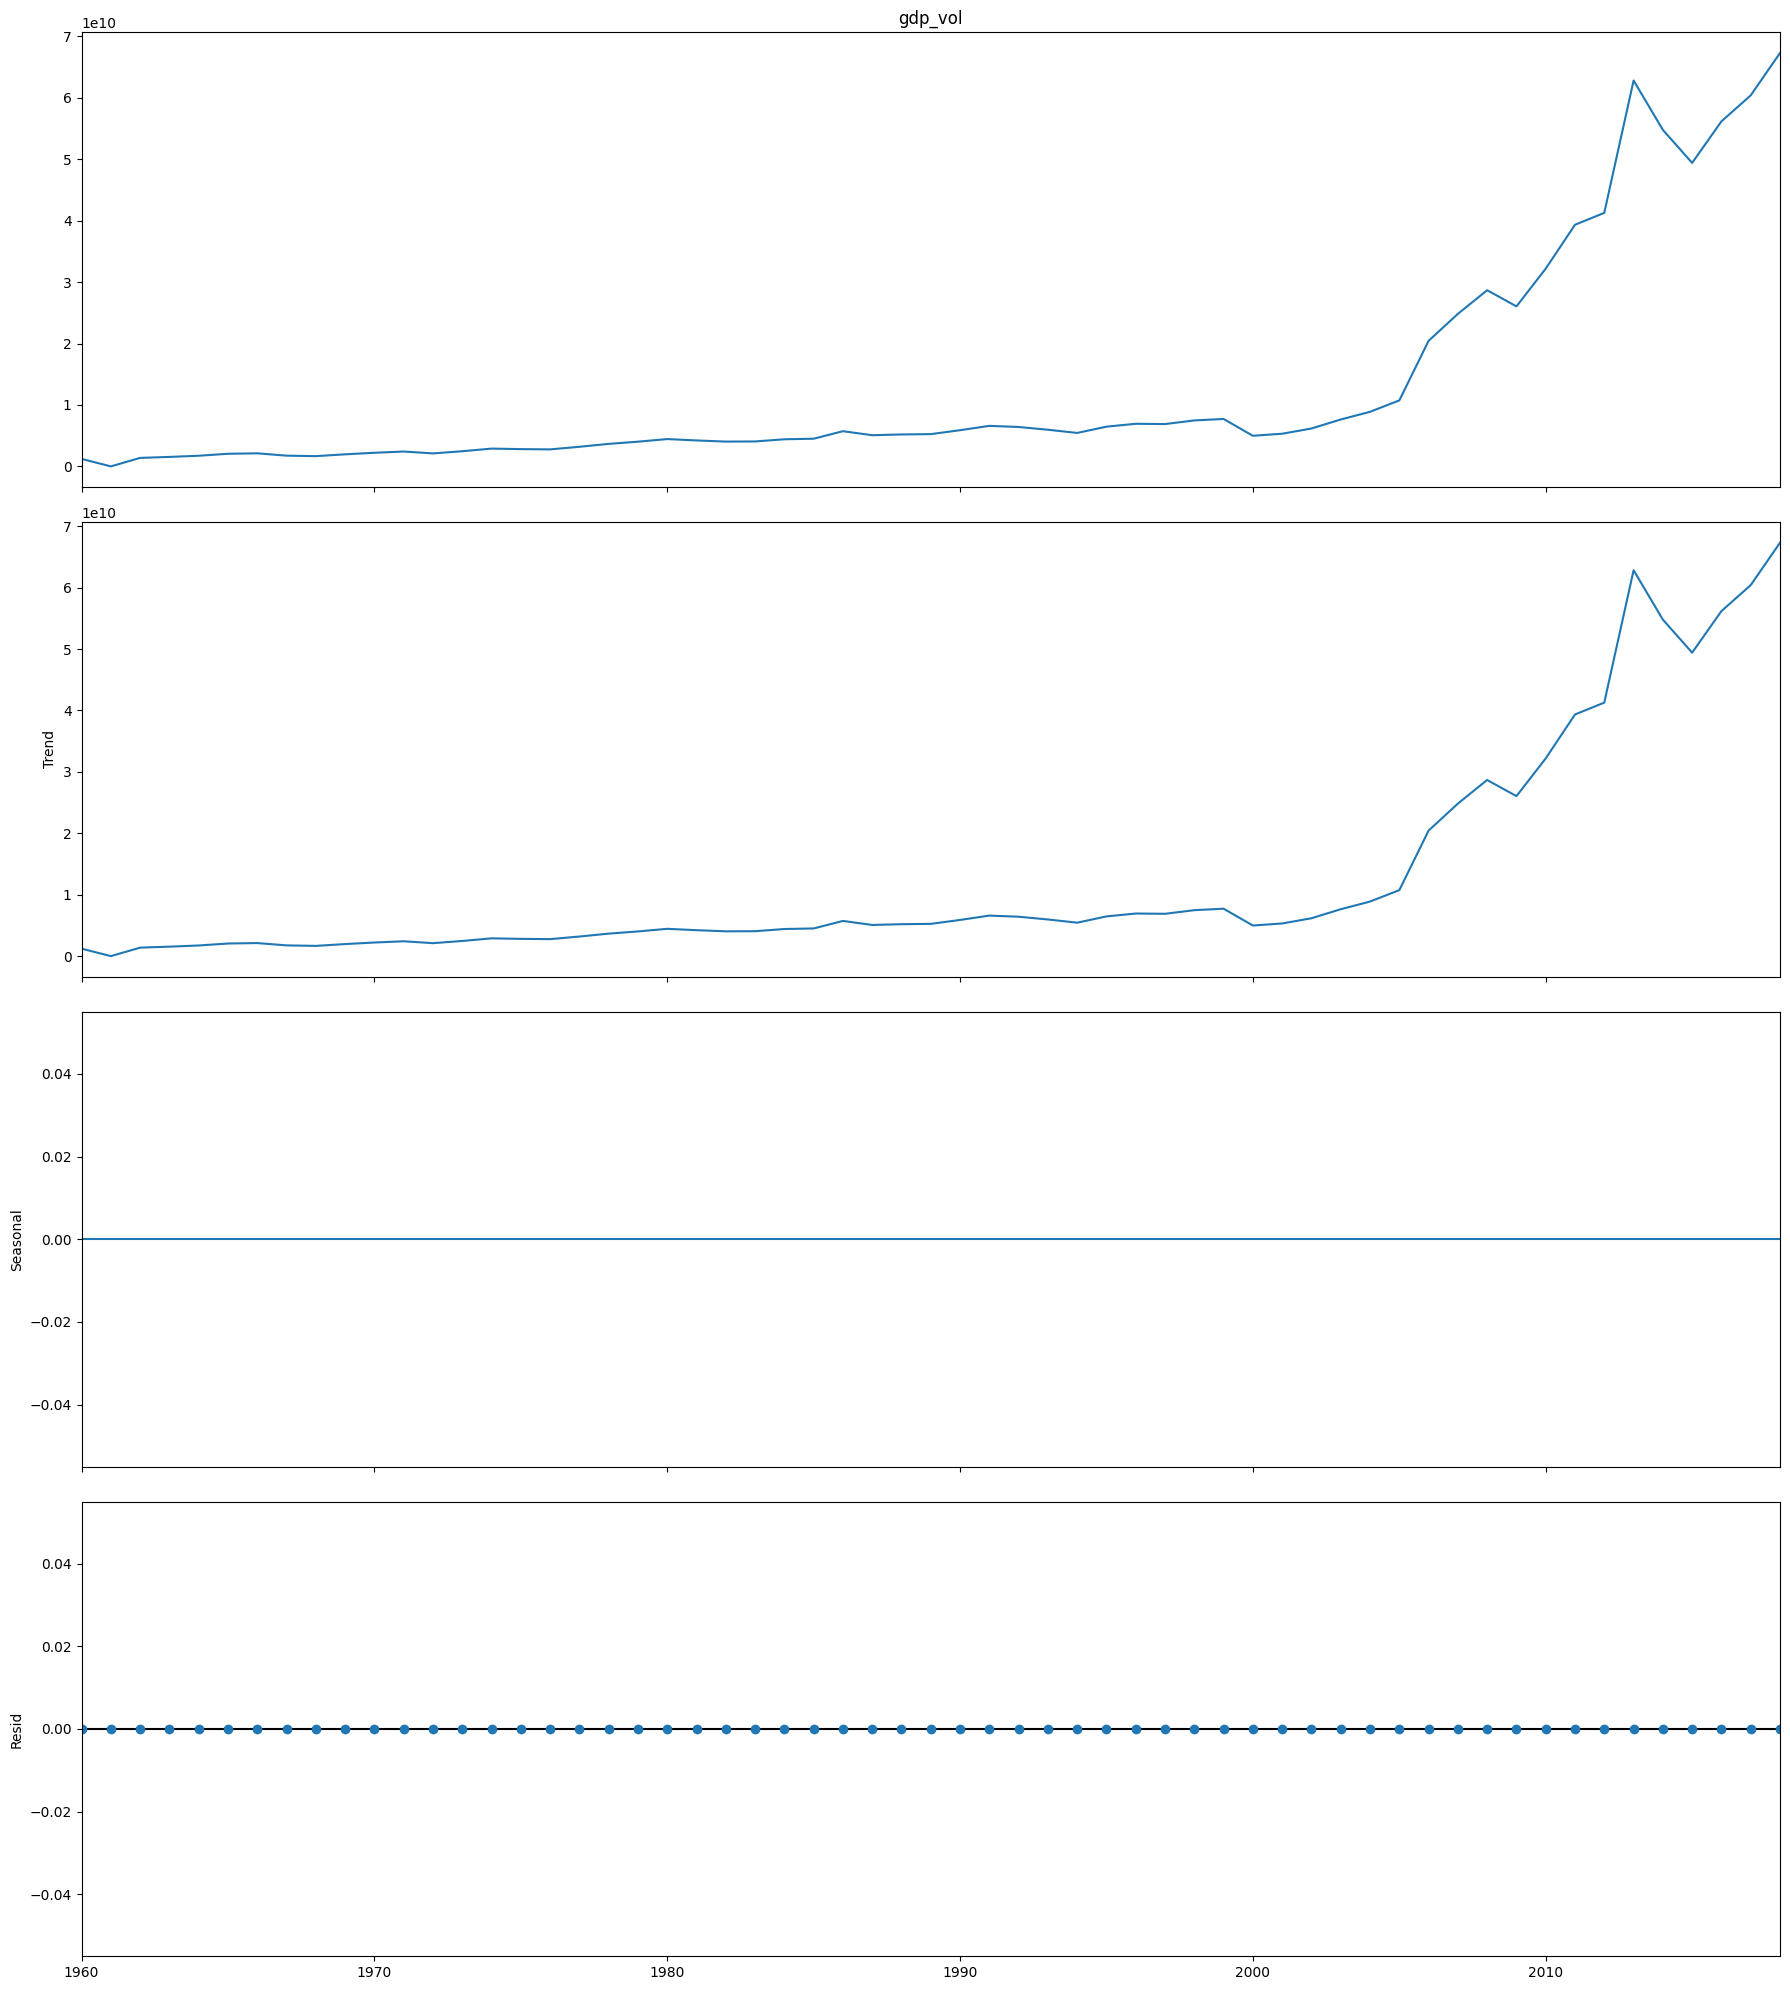

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 18, 20

result = seasonal_decompose(train_df.gdp_vol)
result.plot()
plt.show()

Выводы:
1. Изменение ВВП нелинейно - с 1960 по 2000 годы наблюдается практически линейный рост, с 2000 по 2020 годы видны ленинейные рывки роста и падения показателя.
2. Сезонности не наблюдается.
3. Шум отсутствует. 

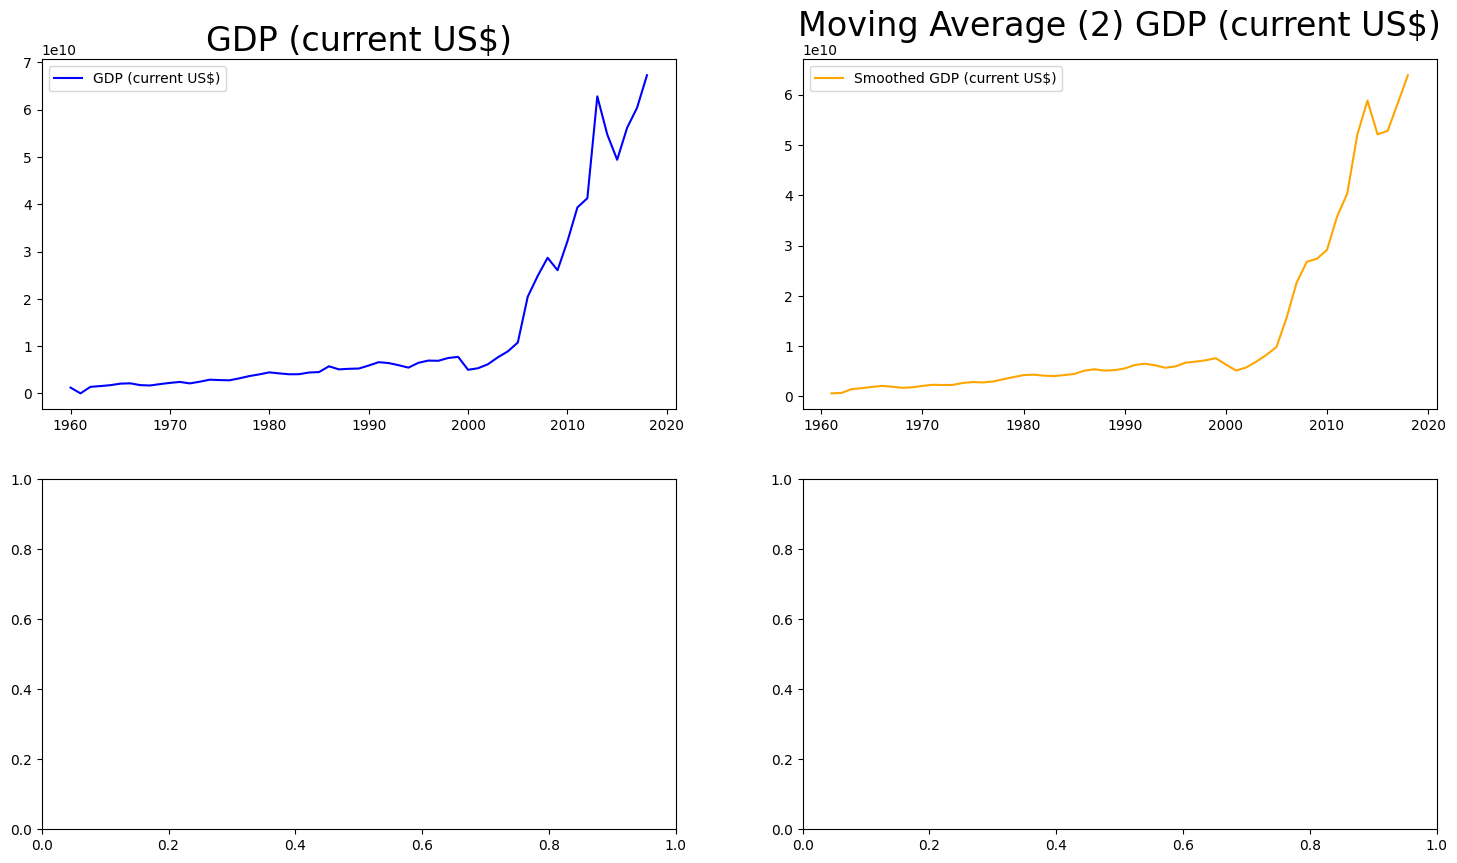

In [4]:
plt.rcParams["figure.figsize"] = 18, 10

fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(train_df.gdp_vol, color="blue", label="GDP (current US$)")
ax[0, 0].set_title("GDP (current US$)", size=24)
ax[0, 0].legend()

ax[0, 1].plot(
    train_df.gdp_vol.rolling(window=2).mean(),
    color="orange",
    label="Smoothed GDP (current US$)",
)

ax[0, 1].set_title("Moving Average (2) GDP (current US$)", size=24)
ax[0, 1].legend()



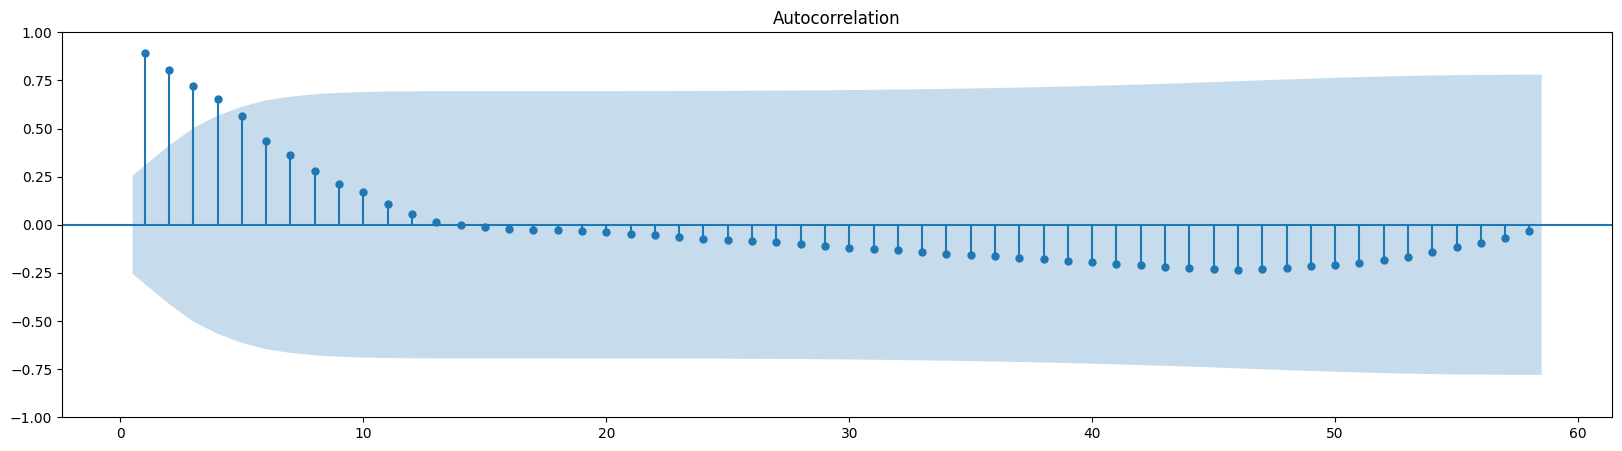

In [5]:
import statsmodels.graphics.tsaplots as sgt

plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_acf(train_df.gdp_vol, lags=58, zero=False)
plt.show()

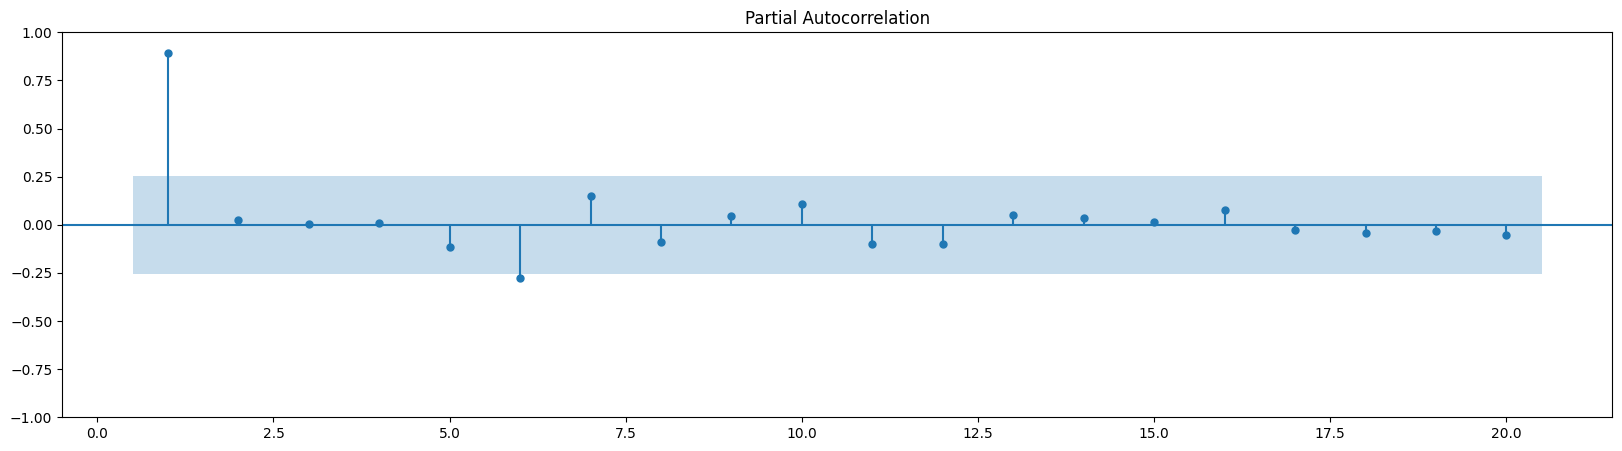

In [6]:
import statsmodels.graphics.tsaplots as sgt

plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_pacf(train_df.gdp_vol, lags=20, method="ywm", zero=False)
plt.show()

Вывод: Тренд есть, исходный график и график скользящего среднего практически идентичны, величины ВВП скоррелированны.

In [7]:
from statsmodels.tsa.stattools import adfuller

adfuller(train_df["gdp_vol"])


test1 = adfuller(train_df["gdp_vol"])
print("adf: ", test1[0])
print("p-value: ", test1[1])
print("Critical values: ", test1[4])
if test1[0] > test1[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  0.6529066974885349
p-value:  0.9888496277665572
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
ряд нестационарен


Вывод: временной ряд не стационарный, требуется его дифференцирование.

In [8]:
import statsmodels.graphics.tsaplots as sgt

def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 5

    fig, axes = plt.subplots(1, 2)

    sgt.plot_acf(series, ax=axes[0], lags=27)
    sgt.plot_pacf(series, ax=axes[1], lags=27, method="ywm")
    plt.show()

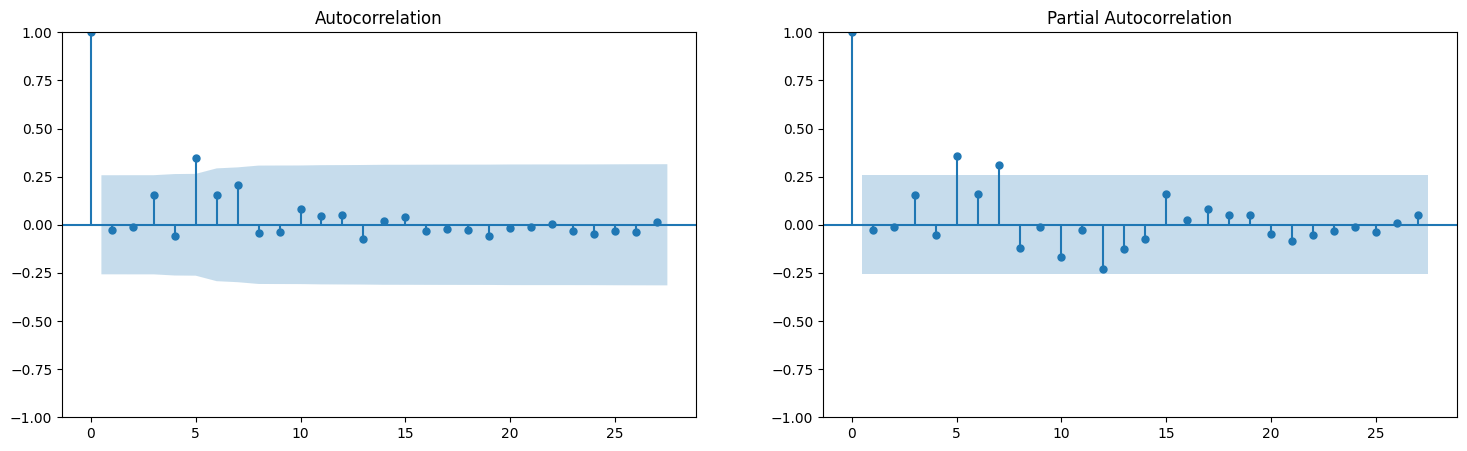

(-1.6702483038320777,
 0.446502932971389,
 7,
 50,
 {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616},
 2147.2038799920597)

In [9]:
train_df_diff_1 = train_df["gdp_vol"].diff()
plot_acf_pacf(train_df_diff_1.dropna())
adfuller(train_df_diff_1.dropna())

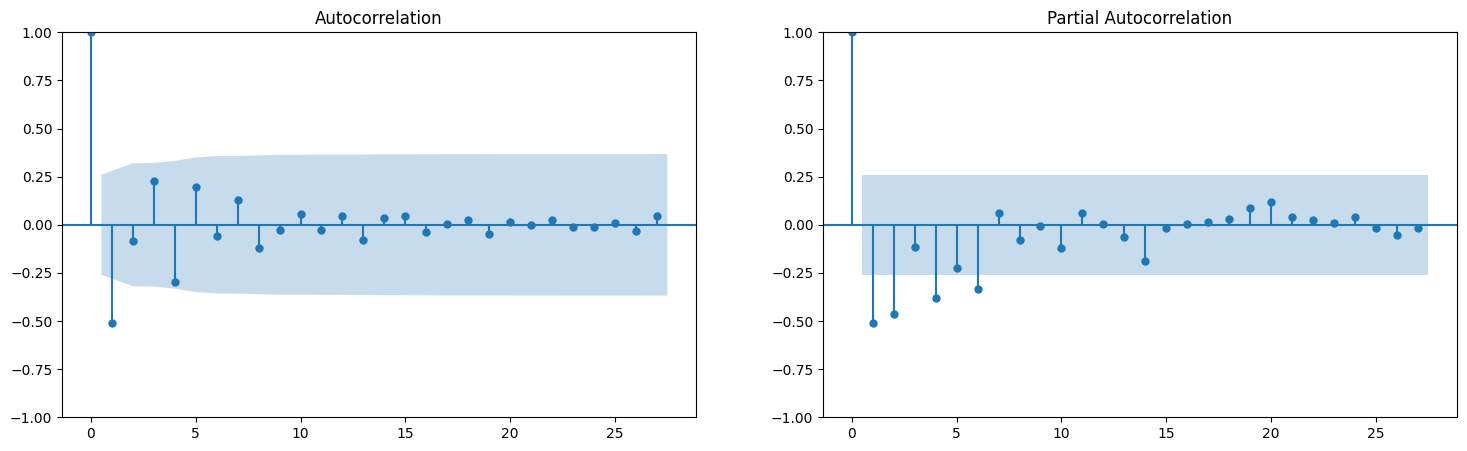

(-2.6408690561284898,
 0.08484116917837664,
 7,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 2102.755187953874)

In [10]:
train_df_diff_2 = train_df_diff_1.diff()
plot_acf_pacf(train_df_diff_2.dropna())
adfuller(train_df_diff_2.dropna())

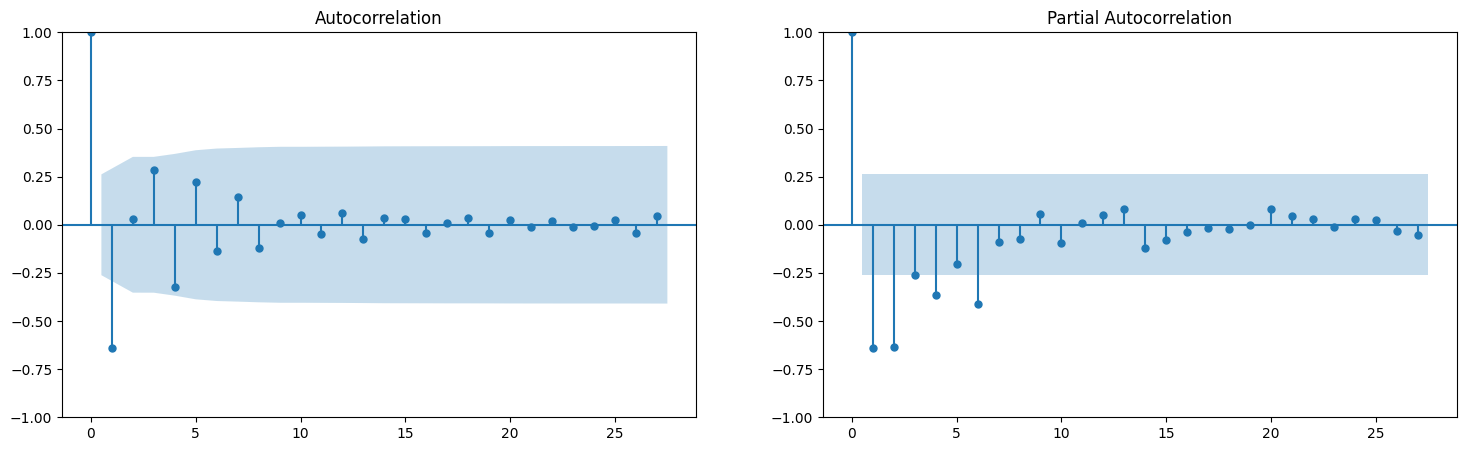

(-4.779623784828512,
 5.9483276402254376e-05,
 7,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 2060.481155659526)

In [11]:
train_df_diff_3 = train_df_diff_2.diff()
plot_acf_pacf(train_df_diff_3.dropna())
adfuller(train_df_diff_3.dropna())

In [12]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_df["gdp_vol"].dropna(), order=(6, 3, 1))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

c:\Users\DIMEDROL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\DIMEDROL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\DIMEDROL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\DIMEDROL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                gdp_vol   No. Observations:                   59
Model:                 ARIMA(6, 3, 1)   Log Likelihood               -1306.570
Date:                Tue, 31 Oct 2023   AIC                           2629.140
Time:                        21:47:26   BIC                           2645.343
Sample:                    01-01-1960   HQIC                          2635.422
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3723      0.072    -19.184      0.000      -1.513      -1.232
ar.L2         -1.7074      0.156    -10.942      0.000      -2.013      -1.402
ar.L3         -1.5726      0.205     -7.658      0.000      -1.975      -1.170
ar.L4         -1.6483      0.141    -11.714      0.000      -1.924      -1.373
ar.L5         -1.2768      0.159     -8.021      0.000      -1.589      -0.965
ar.L6         -0.8853      0.148     -5.974      0.000      -1.176      -0.595
ma.L1         -0.5920      0.104     -5.673      0.000      -0.796      -0.387
sigma2      8.567e+18   3.66e-20   2.34e+38      0.000    8.57e+18    8.57e+18
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                73.04
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):              76.70   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.62e+54. Standard errors may be unstable.
"""

In [15]:
import pmdarima as pm

smodel = pm.auto_arima(
    train_df,
    start_p=1,
    d=1,
    start_q=1,
    max_p=6,
    max_q=6,
    D=1,
    start_P=0,
    test="adf",
    error_action="ignore",
    trace=True,
)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2732.043, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2728.025, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2729.982, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2730.117, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2730.972, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.093 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1362.013
Date:                Tue, 31 Oct 2023   AIC                           2728.025
Time:                        21:48:38   BIC                           2732.146
Sample:                    01-01-1960   HQIC                          2729.631
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.139e+09   5.02e+08      2.270      0.023    1.56e+08    2.12e+09
sigma2      1.461e+19      0.176   8.28e+19      0.000    1.46e+19    1.46e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               451.60
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):              34.65   Skew:                             2.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [16]:
arima_model = ARIMA(train_df["gdp_vol"].dropna(), order=(0, 1, 0))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

c:\Users\DIMEDROL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\DIMEDROL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\DIMEDROL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                gdp_vol   No. Observations:                   59
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1364.486
Date:                Tue, 31 Oct 2023   AIC                           2730.972
Time:                        21:48:49   BIC                           2733.032
Sample:                    01-01-1960   HQIC                          2731.774
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.564e+19   1.03e+18     15.147      0.000    1.36e+19    1.77e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               451.60
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):             188.21   Skew:                             2.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
pred_df = pd.DataFrame(index=data.index)

pred_df["model_preds"] = arima_model_fit.predict(
    start=test_df.index[0], end=test_df.index[-1]
)


pred_df["gdp_vol"] = data["gdp_vol"]

forecast = arima_model_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha=0.05)  # Confidence level of 95%

pred_df.at[test_df.index, "model_preds_lower"] = forecast_df["lower gdp_vol"]
pred_df.at[test_df.index, "model_preds_upper"] = forecast_df["upper gdp_vol"]

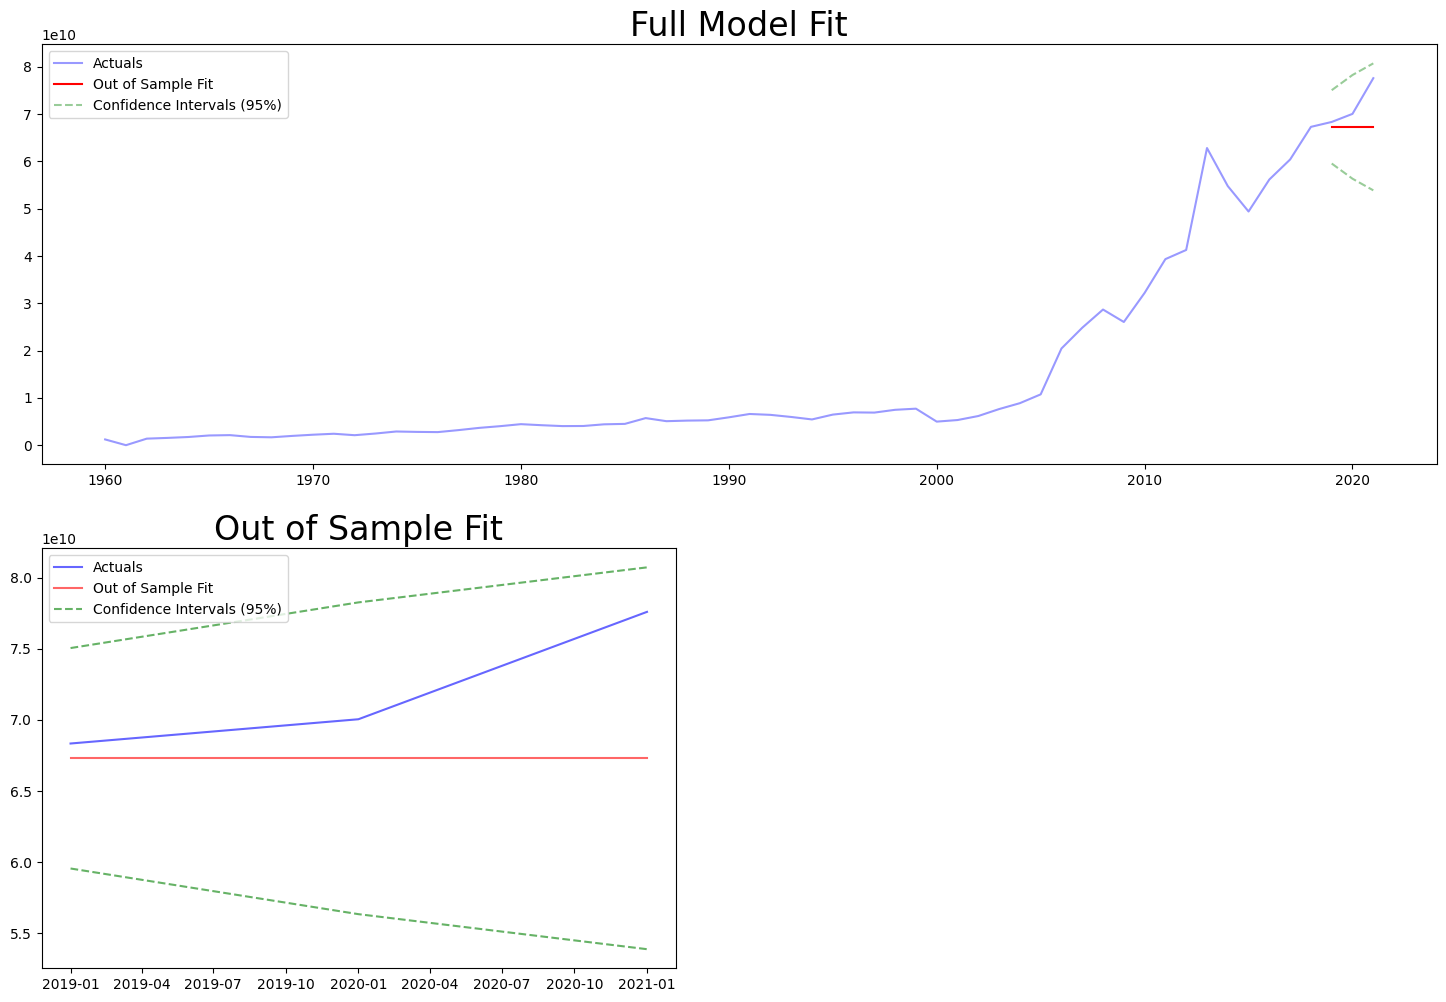

In [18]:
plt.rcParams["figure.figsize"] = 18, 12

plt.subplot(2, 1, 1)
plt.plot(pred_df["gdp_vol"], color="blue", label="Actuals", alpha=0.4)

plt.plot(
    pred_df.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.4,
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.4,
)

plt.title("Full Model Fit", size=24)
plt.legend()

plt.subplot(2, 2, 3)

plt.plot(
    pred_df.loc[test_df.index]["gdp_vol"], color="blue", label="Actuals", alpha=0.6
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
    alpha=0.6,
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.6,
)

plt.plot(
    pred_df.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.6,
)

plt.title("Out of Sample Fit", size=24)
plt.legend()

plt.show()

Выводы: модель показала тренд, результаты удовлетворительны.

# Часть 2.
# Интерполяция и сэмплирование.

In [19]:
data.asfreq(freq='AS')

,gdp_vol
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09
...,...
2017-01-01,6.040638e+10
2018-01-01,6.729928e+10
2019-01-01,6.833754e+10


In [20]:
data.isna().sum()

gdp_vol    0
dtype: int64

Вывод: пропусков нет.

In [21]:
import numpy as np
data['gdp_vol'] = data['gdp_vol'].apply(lambda x: np.nan if x==0 else x)
data.isna().sum()

gdp_vol    1
dtype: int64

Вывод: Заполним ноль в данных.

(62, 1)


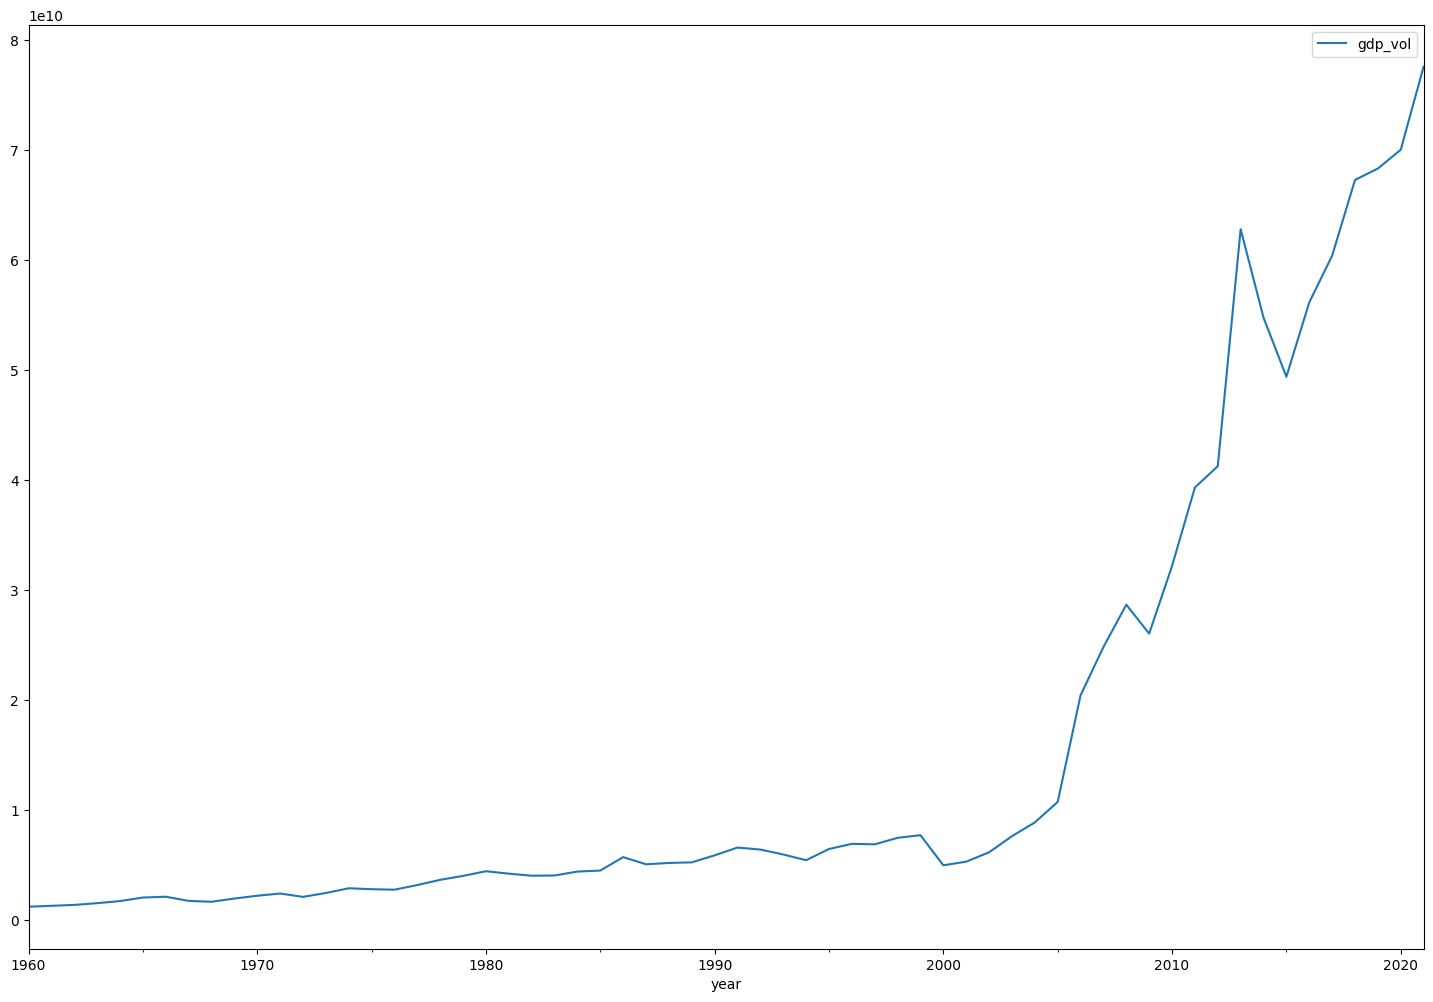

In [22]:
interpolated_data = pd.DataFrame(
    data.interpolate(), columns=["gdp_vol"]
)

print(interpolated_data.shape)
interpolated_data.plot()
plt.show()

In [23]:
train_df = interpolated_data.loc[:"2018-12-31"]
test_df = interpolated_data.loc["2019-01-01":]
train_df.shape, test_df.shape

((59, 1), (3, 1))

In [24]:
adfuller(train_df["gdp_vol"])


test1 = adfuller(train_df["gdp_vol"])
print("adf: ", test1[0])
print("p-value: ", test1[1])
print("Critical values: ", test1[4])
if test1[0] > test1[4]["5%"]:
    print("ряд нестационарен")
else:
    print("ряд стационарен")

adf:  0.8030073326980129
p-value:  0.9916845572455877
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
ряд нестационарен


Вывод: временной ряд не стационарный, требуется его дифференцирование.

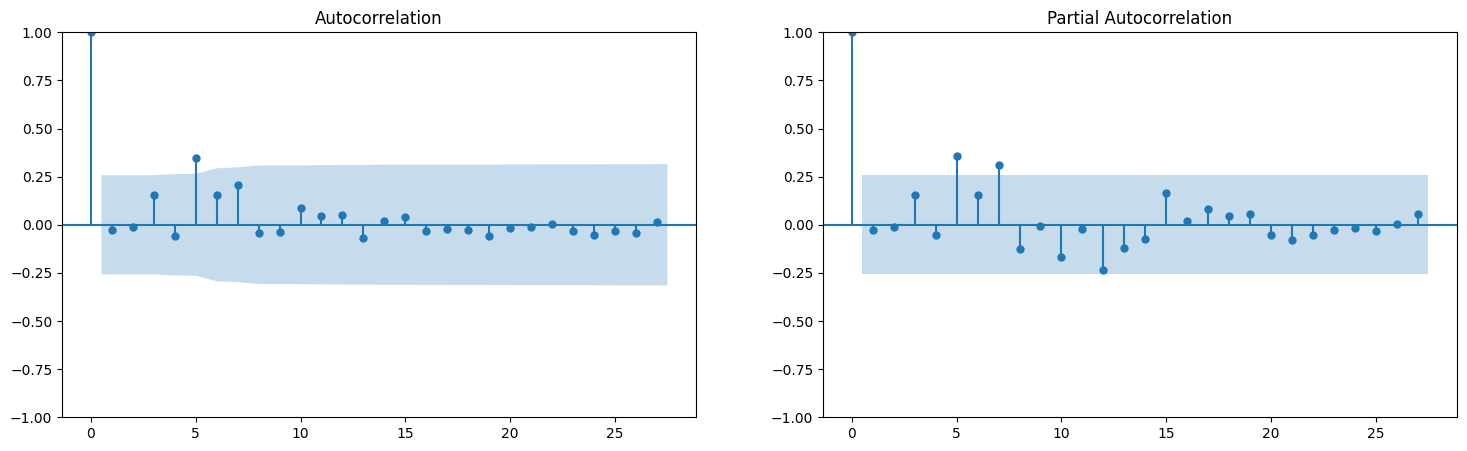

(-1.8255652246435998,
 0.36784515276563423,
 7,
 50,
 {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616},
 2147.2038799920597)

In [25]:
train_df_diff_1 = train_df["gdp_vol"].diff()
plot_acf_pacf(train_df_diff_1.dropna())
adfuller(train_df_diff_1.dropna())

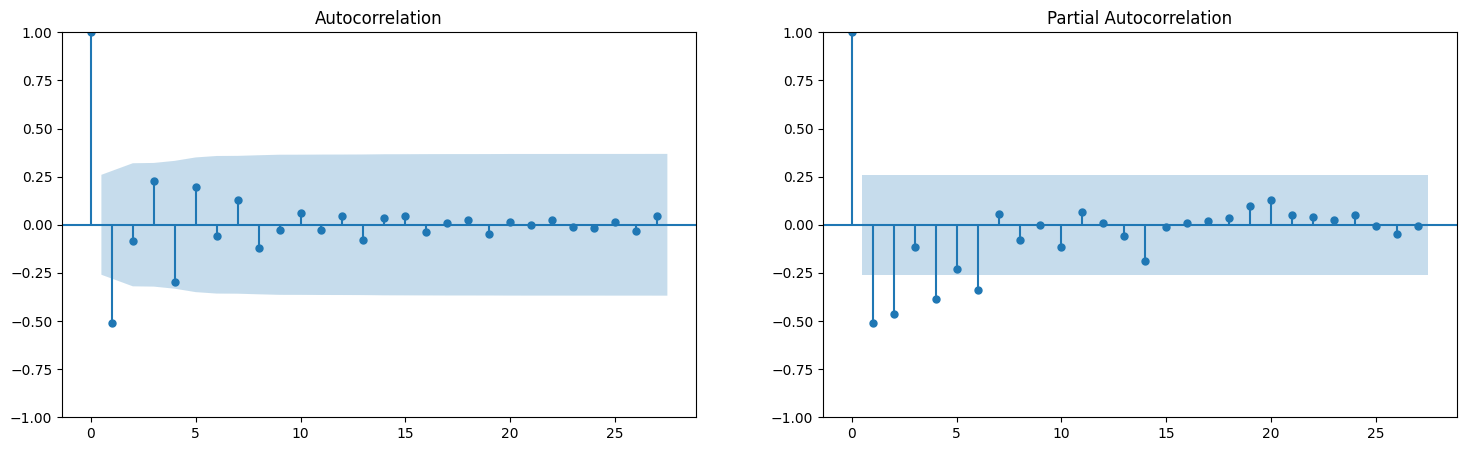

(-2.634634746007842,
 0.0860481372219768,
 7,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 2102.755187953874)

In [26]:
train_df_diff_2 = train_df_diff_1.diff()
plot_acf_pacf(train_df_diff_2.dropna())
adfuller(train_df_diff_2.dropna())

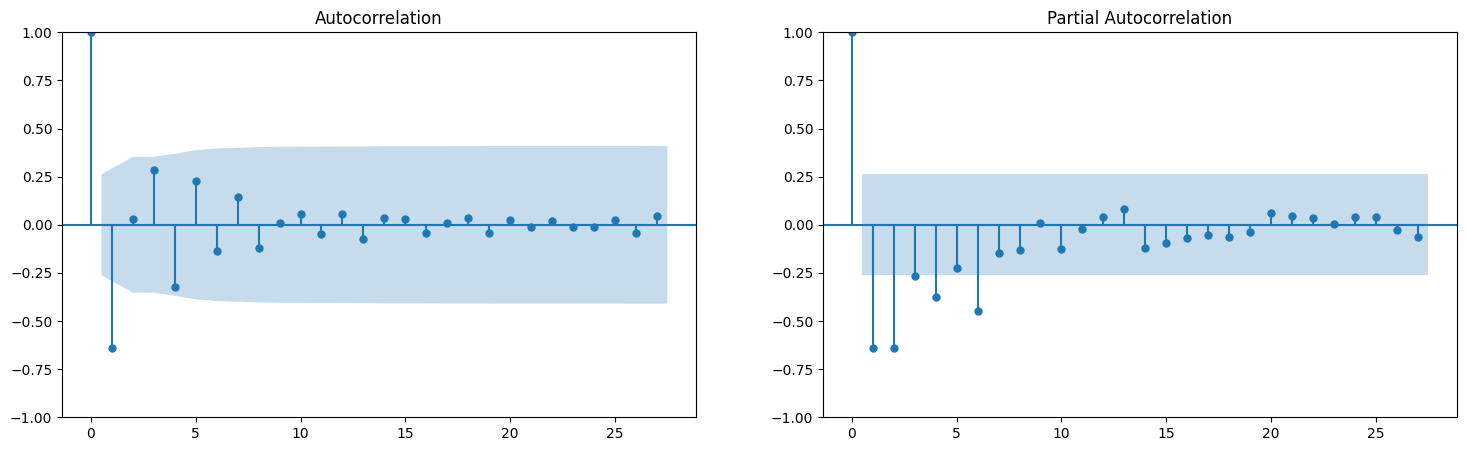

(-4.825603687304014,
 4.857318076800112e-05,
 7,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 2060.481155659526)

In [27]:
train_df_diff_3 = train_df_diff_2.diff()
plot_acf_pacf(train_df_diff_3.dropna())
adfuller(train_df_diff_3.dropna())

In [28]:
smodel = pm.auto_arima(
    train_df,
    start_p=1,
    d=1,
    start_q=1,
    max_p=6,
    max_q=6,
    D=1,
    start_P=0,
    test="adf",
    error_action="ignore",
    trace=True,
)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2731.832, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2727.794, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2729.762, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2729.910, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2730.759, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.080 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1361.897
Date:                Tue, 31 Oct 2023   AIC                           2727.794
Time:                        21:56:06   BIC                           2731.915
Sample:                    01-01-1960   HQIC                          2729.399
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.139e+09   5.01e+08      2.275      0.023    1.58e+08    2.12e+09
sigma2      1.455e+19      0.178   8.19e+19      0.000    1.45e+19    1.45e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               460.10
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):              40.58   Skew:                             2.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [29]:
arima_model = ARIMA(train_df["gdp_vol"].dropna(), order=(0, 1, 0))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

c:\Users\DIMEDROL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\DIMEDROL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\DIMEDROL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                gdp_vol   No. Observations:                   59
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1364.380
Date:                Tue, 31 Oct 2023   AIC                           2730.759
Time:                        21:56:12   BIC                           2732.819
Sample:                    01-01-1960   HQIC                          2731.562
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.558e+19   1.02e+18     15.206      0.000    1.36e+19    1.76e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               460.10
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):             621.16   Skew:                             2.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Вывод: AIC практически не изменился по сравнению с моделью на неинтерполированных данных.

# Часть 3.
# Модели прогнозирования гетероскедастичности. Валидация временных рядов.

In [30]:
data["gdp_vol"] = data.gdp_vol.pct_change(1).mul(100).abs()
data["gdp_vol"].head()

year
1960-01-01          NaN
1961-01-01     0.000000
1962-01-01    13.578826
1963-01-01    11.448835
1964-01-01    12.363636
Name: gdp_vol, dtype: float64

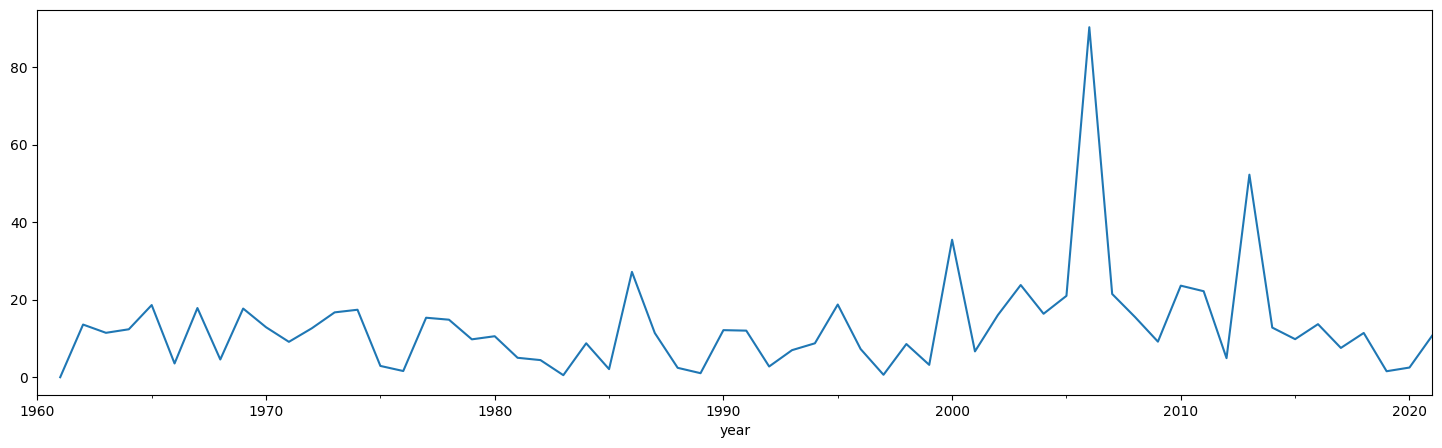

In [31]:
data["gdp_vol"].plot()
plt.show()

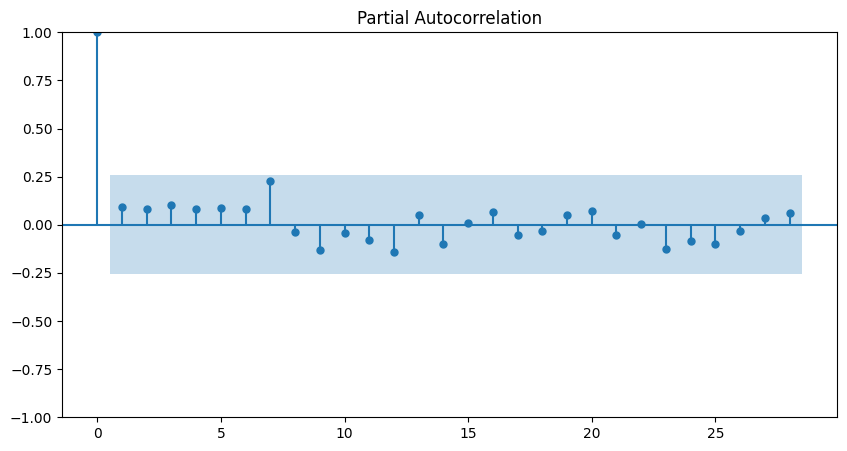

In [32]:
train_df = data.loc[:"2018-12-31"]
test_df = data.loc["2019-01-01":]
train_df.shape, test_df.shape

plt.rcParams["figure.figsize"] = 10, 5

sgt.plot_pacf(train_df.gdp_vol[1:], lags=28, method="ywm")
plt.show()

In [33]:
adfuller(train_df.gdp_vol[1:])

(-6.816105099260228,
 2.0572875762632108e-09,
 0,
 57,
 {'1%': -3.5506699942762414,
  '5%': -2.913766394626147,
  '10%': -2.5946240473991997},
 382.739595975669)

Вывод: ряд стационарен.

In [34]:
garch_df = pd.DataFrame(data["gdp_vol"].loc[data.index])
garch_df.loc[train_df.index, "gdp_vol"] = train_df["gdp_vol"].dropna()

In [36]:
from arch import arch_model

model = arch_model(garch_df["gdp_vol"].dropna(), p=2, q=2)

model_results = model.fit(last_obs=test_df.index[0], update_freq=5)

Iteration:      5,   Func. Count:     39,   Neg. LLF: 229.3859465639944
Iteration:     10,   Func. Count:     75,   Neg. LLF: 227.7029573981161
Iteration:     15,   Func. Count:    110,   Neg. LLF: 227.56407851901568
Iteration:     20,   Func. Count:    145,   Neg. LLF: 227.48396484447403
Optimization terminated successfully    (Exit mode 0)
            Current function value: 227.48361196906473
            Iterations: 23
            Function evaluations: 158
            Gradient evaluations: 22


In [37]:
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                gdp_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -227.484
Distribution:                  Normal   AIC:                           466.967
Method:            Maximum Likelihood   BIC:                           479.330
                                        No. Observations:                   58
Date:                Tue, Oct 31 2023   Df Residuals:                       57
Time:                        21:58:44   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            12.3709      2.077      5.956  2.591e-09 [  8.300, 16.442]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          3.5723     16.472      0.217      0.828 [-28.713, 35.857]
alpha[1]       0.0000      0.106      0.000      1.000 [ -0.208,  0.208]
alpha[2]       0.0000      0.148      0.000      1.000 [ -0.290,  0.290]
beta[1]        1.0000      0.902      1.109      0.268 [ -0.768,  2.768]
beta[2]    8.3894e-11      0.865  9.700e-11      1.000 [ -1.695,  1.695]
========================================================================

Covariance estimator: robust
"""

In [38]:
predictions_df = test_df.copy()
predictions_df["Predictions"] = model_results.forecast().residual_variance.loc[
    test_df.index
]

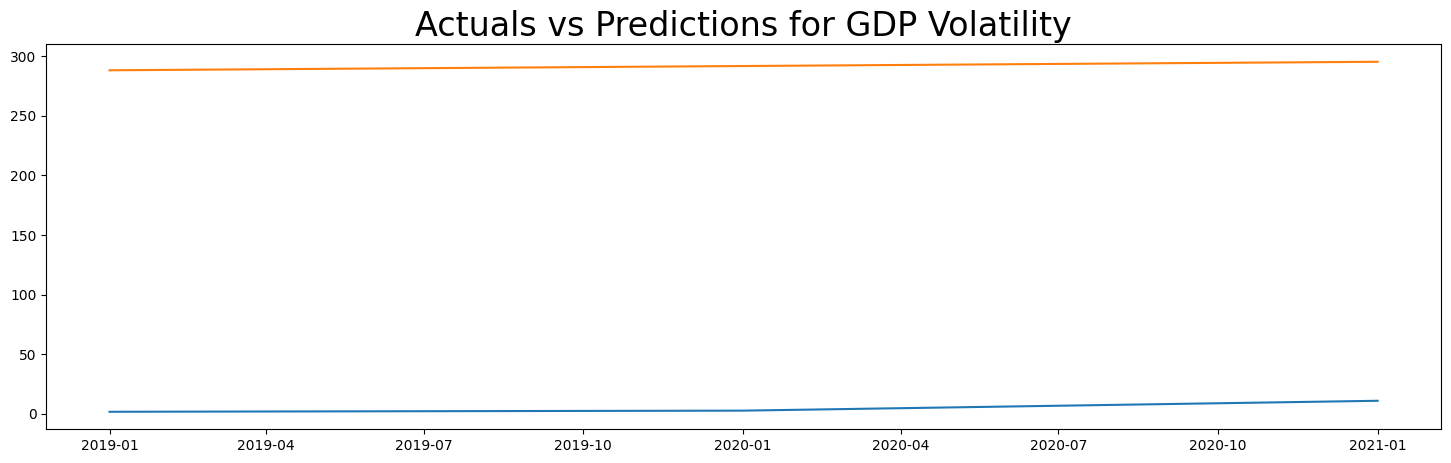

In [412]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(predictions_df["gdp_vol"].abs())
plt.plot(predictions_df["Predictions"])

plt.title("Actuals vs Predictions for GDP Volatility", size=24)

plt.show()

In [39]:
import numpy as np
from sklearn.metrics import mean_squared_error

mean_squared_error(
    predictions_df["gdp_vol"].abs(), predictions_df["Predictions"])

82349.60447240587

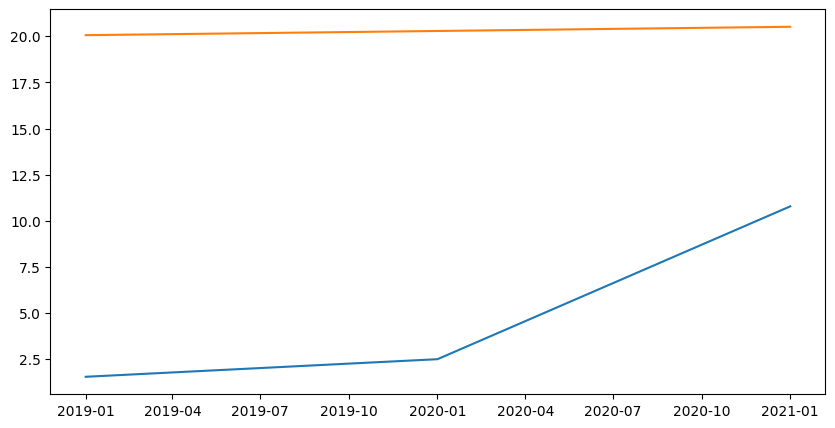

In [40]:
from sklearn.linear_model import LinearRegression

X_train = pd.DataFrame(range(data["gdp_vol"].shape[0]))[
    : train_df.shape[0]
].fillna(0)
X_test = pd.DataFrame(range(data["gdp_vol"].shape[0]))[
    train_df.shape[0] :
].fillna(0)
y_train = train_df["gdp_vol"].fillna(0)
y_test = test_df["gdp_vol"].fillna(0)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)


plt.plot(y_test)
plt.plot(pd.Series(lr_predict, index=y_test.index))
plt.show()

Вывод: результаты неудовлетворительны, это видно в метрике MSE и критерии AIC.
Я полагаю, что такой результат возник из-за попытки предсказать дисперсию остатков с помощью ARCH при условии, что гетероскедастичности в исходных данных нет.